In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

In [2]:
import pandas as pd
from pathlib import Path

DATA_PATH = PROJECT_ROOT / "data" / "aclImdb"

In [3]:
def load_imdb_split(split: str):
    assert split in {"train", "test"}
    reviews = []
    labels = []

    base = DATA_PATH / split
    for label in ["pos", "neg"]:
        folder = base / label
        for file in folder.glob("*.txt"):
            text = file.read_text(encoding="utf-8")
            reviews.append(text)
            labels.append(1 if label == "pos" else 0)

    return pd.DataFrame({"review": reviews, "label": labels})

In [4]:
df_train = load_imdb_split("train")
df_test = load_imdb_split("test")

len(df_train), len(df_test)

(25000, 25000)

### BASIC SANITY CHECKS

In [5]:
df_train.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [6]:
# class balance:
df_train['label'].value_counts()

label
1    12500
0    12500
Name: count, dtype: int64

In [7]:
# Review lengths
df_train['length'] = df_train['review'].apply(len)
df_train['length'].describe()

count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: length, dtype: float64

In [8]:
# shortest
df_train.sort_values('length').head(3)

,review,label,length
13568,This movie is terrible but it has some good ef...,0,52
16479,I wouldn't rent this one even on dollar rental...,0,53
14807,Ming The Merciless does a little Bardwork and ...,0,64


In [9]:
# longest
df_train.sort_values('length').tail(3)

,review,label,length
49,Titanic directed by James Cameron presents a f...,1,10321
6258,**Attention Spoilers**<br /><br />First of all...,1,10363
1954,Match 1: Tag Team Table Match Bubba Ray and Sp...,1,13704


In [10]:
# HTML tags:
df_train['review'].str.contains('<').sum()

np.int64(14671)

### LENGTH DISTRIBUTION

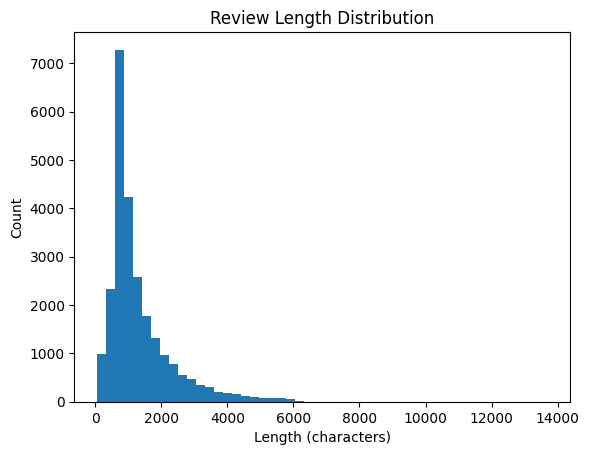

In [11]:
import matplotlib.pyplot as plt

plt.hist(df_train['length'], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.show()

In [12]:
[s for s in df_train[df_train['length'] > 2000]['review'].head(3)]

['Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they\'ll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it\'s like to be homeless? That is Goddard Bolt\'s lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days witho

In [13]:
df_train[df_train['length'] < 100]['review'].head(5).tolist()

["I don't know why I like this movie so well, but I never get tired of watching it.",
 'Adrian Pasdar is excellent is this film. He makes a fascinating woman.',
 'This movie is terrible but it has some good effects.',
 'Ming The Merciless does a little Bardwork and a movie most foul!',
 "I wouldn't rent this one even on dollar rental night."]

In [14]:
df_train['review'].str.strip().str.len().describe()

count    25000.000000
mean      1325.068600
std       1003.132835
min         52.000000
25%        702.000000
50%        979.000000
75%       1614.000000
max      13704.000000
Name: review, dtype: float64

In [15]:
df = pd.concat([df_train.assign(split="train"), df_test.assign(split="test")])
df.head()

,review,label,length,split
0,Bromwell High is a cartoon comedy. It ran at t...,1,806.0,train
1,Homelessness (or Houselessness as George Carli...,1,2366.0,train
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,841.0,train
3,This is easily the most underrated film inn th...,1,663.0,train
4,This is not the typical Mel Brooks film. It wa...,1,647.0,train


In [16]:
save_path = PROJECT_ROOT / "data" / "imdb_raw.csv"
df.to_csv(save_path, index=False)
print("Saved to:", save_path)

Saved to: C:\Users\Антон\OneDrive\Документы\Machine Learning\Projects\imdb-sentiment\data\imdb_raw.csv
